In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [3]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
df.shape

(200, 5)

In [5]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [10]:
num_clusters = 5  # You can experiment with different values of k
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
kmeans.fit(X)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [11]:
df['Cluster'] = kmeans.predict(X)


In [12]:
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
print(cluster_centers)


Cluster Centers:
[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


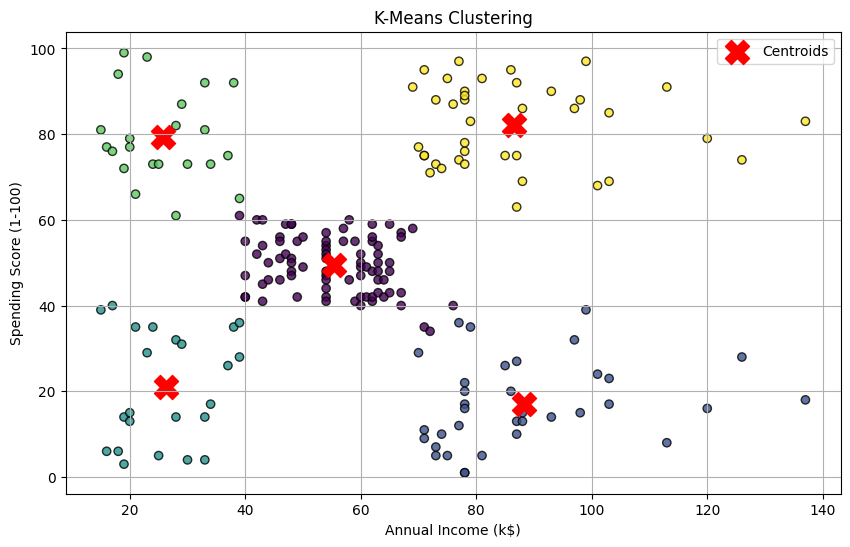

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', marker='o', edgecolors='k', alpha=0.8)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()